In [1]:
!pip install ultralytics==8.0.20


                                              0.0/261.2 kB ? eta -:--:--
     ---------                               61.4/261.2 kB 1.1 MB/s eta 0:00:01
     ----------------------------------     235.5/261.2 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 261.2/261.2 kB 2.7 MB/s eta 0:00:00
                                              0.0/224.8 kB ? eta -:--:--
     -------------------------------------- 224.8/224.8 kB 4.6 MB/s eta 0:00:00
                                              0.0/895.9 kB ? eta -:--:--
     ---------------                       368.6/895.9 kB 11.6 MB/s eta 0:00:01
     --------------------------------       757.8/895.9 kB 9.6 MB/s eta 0:00:01
     -------------------------------------- 895.9/895.9 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: ultralytics
    Found existing ins

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires libclang>=13.0.0, which is not installed.
tensorflow 2.10.0 requires tensorflow-io-gcs-filesystem>=0.23.1, which is not installed.


In [2]:
!pip install roboflow

  Using cached PyYAML-6.0.1-cp39-cp39-win_amd64.whl (152 kB)
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.3.1
    Uninstalling PyYAML-5.3.1:
      Successfully uninstalled PyYAML-5.3.1


In [3]:
import os
HOME = os.getcwd()
print(HOME)

d:\Bootcamp\phase_2\streamlit\yolov8


In [4]:
from ultralytics import YOLO


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


from roboflow import Roboflow
rf = Roboflow(api_key="MZCtG0ZeGsObaI2yEbId")
project = rf.workspace("minecraft-object-detection").project("minecraft-mob-detection")
dataset = project.version(10).download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Minecraft-Mob-Detection-10 in yolov8:: 100%|██████████| 5780/5780 [00:01<00:00, 3562.58it/s]


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 37.4MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Minecraft-Mob-Detection-10/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, kera

In [8]:
!ls /content/datasets/runs/detect/train

args.yaml					    train_batch2175.jpg
confusion_matrix.png				    train_batch2176.jpg
events.out.tfevents.1695311030.bef1501a9b67.1077.0  train_batch2177.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


In [9]:
from IPython.display import display, Image

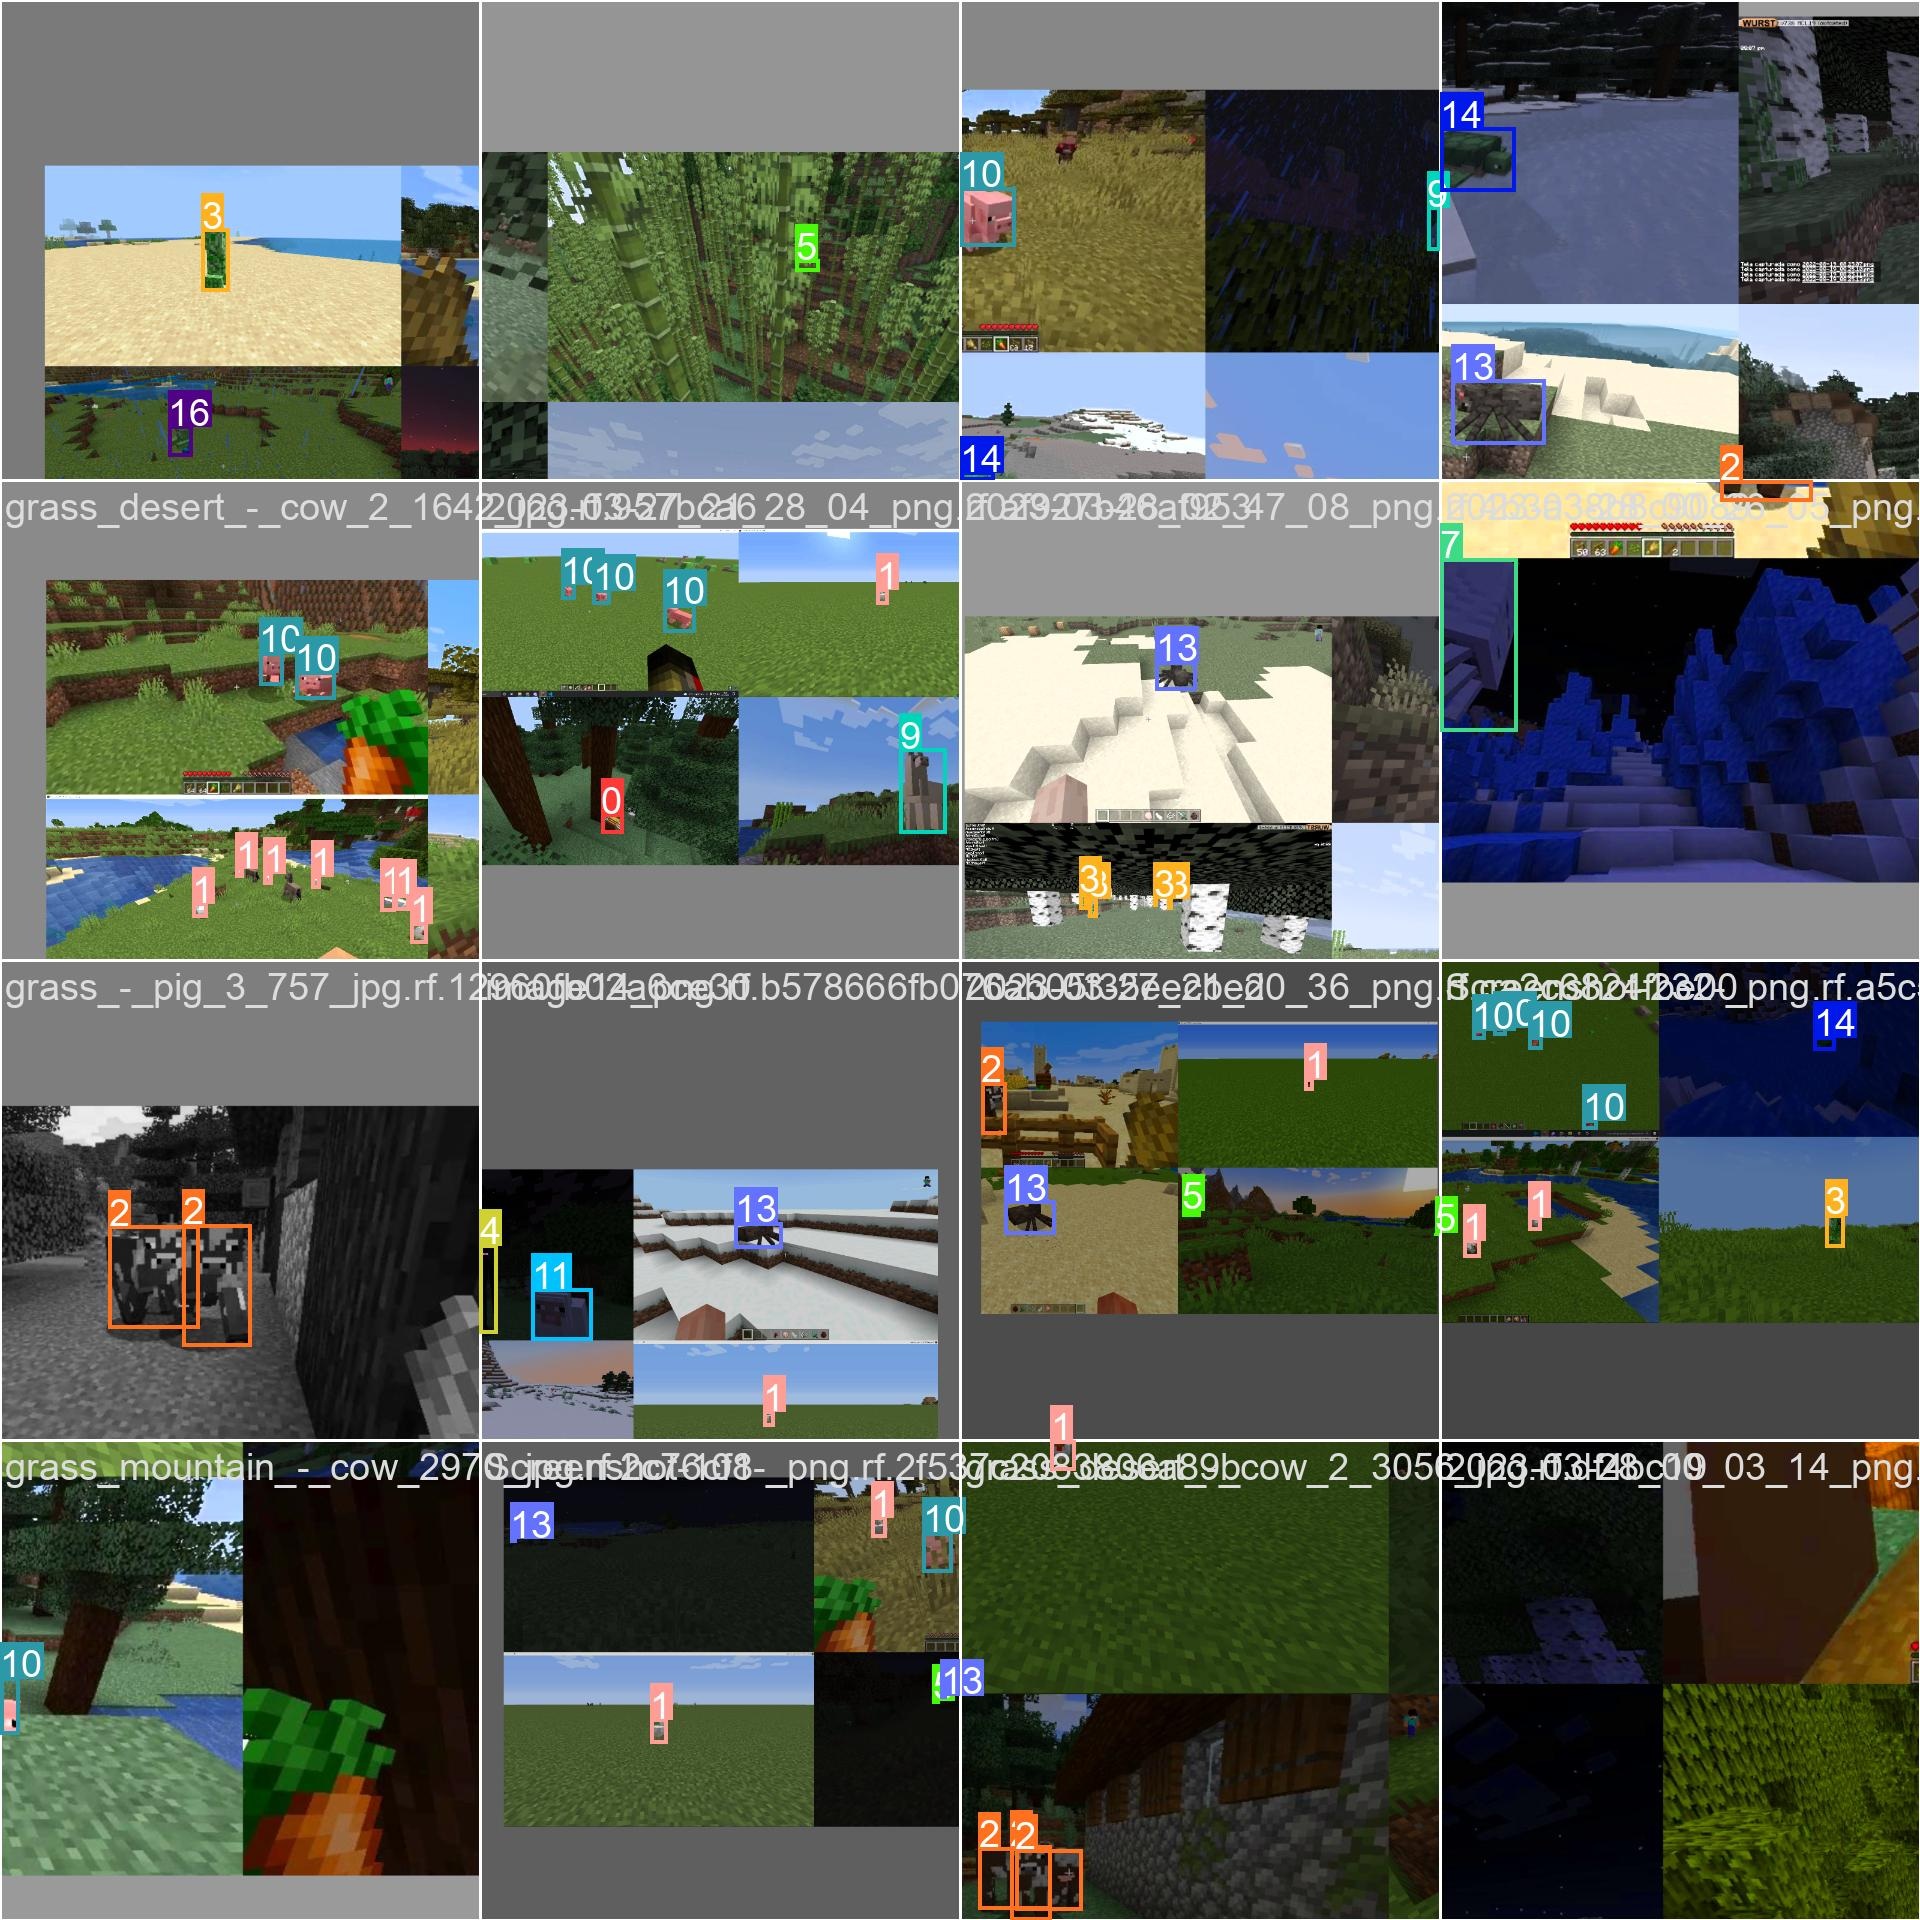

In [16]:
Image(filename=f'/content/datasets/runs/detect/train/train_batch0.jpg', width=600)

In [22]:
%cd {HOME}
!yolo task=detect mode=val model=/content/datasets/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-21 17:21:50.960812: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-21 17:21:52.282892: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11132163 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Minecraft-Mob-Detection-10/valid/labels.cache... 422 images, 0 backgrounds, 0 corrupt: 100% 422/422 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 27/27 [00:20<00:00,  1.32it/s]
                   all        422        697      0.612      0.551      0.564      0.381
               

In [20]:
dataset.location

'/content/datasets/Minecraft-Mob-Detection-10'

In [23]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/datasets/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-09-21 17:23:40.177680: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-21 17:23:41.535947: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11132163 parameters, 0 gradients, 28.5 GFLOPs
image 1/155 /content/datasets/Minecraft-Mob-Detection-10/test/images/-20-_jpg.rf.b6e634a136dcfb16a7a07cda96072ab8.jpg: 576x800 1 goat, 1 sheep, 71.9ms
image 2/155 /content/datasets/Minecraft-Mob-Detection-10/test/images/-21-_jpg.rf.23982f2775c558c4c37a09bbaa2208b4.jpg: 480x800 1 pig, 70.3ms
image 3/155 /content/datasets/Minecraft-Mob-Detection-10/test/images/-22-_jpg.rf.5e6e14

In [31]:
import os
from PIL import Image
from IPython.display import display

image_folder = '/content/runs/detect/predict'
image_files = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.jpg')]

def inference_generator():
    # Получаем список файлов в папке
    image_files = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.jpg')]

    # Итерируемся по всем изображениям
    for img_path in image_files:
        # Открываем изображение
        image = Image.open(img_path)

        # Выполняем инференс
        results = image

        # Возвращаем результаты (или делайте другие операции с результатами, как вам нужно)
        yield results


In [33]:
gen = inference_generator()

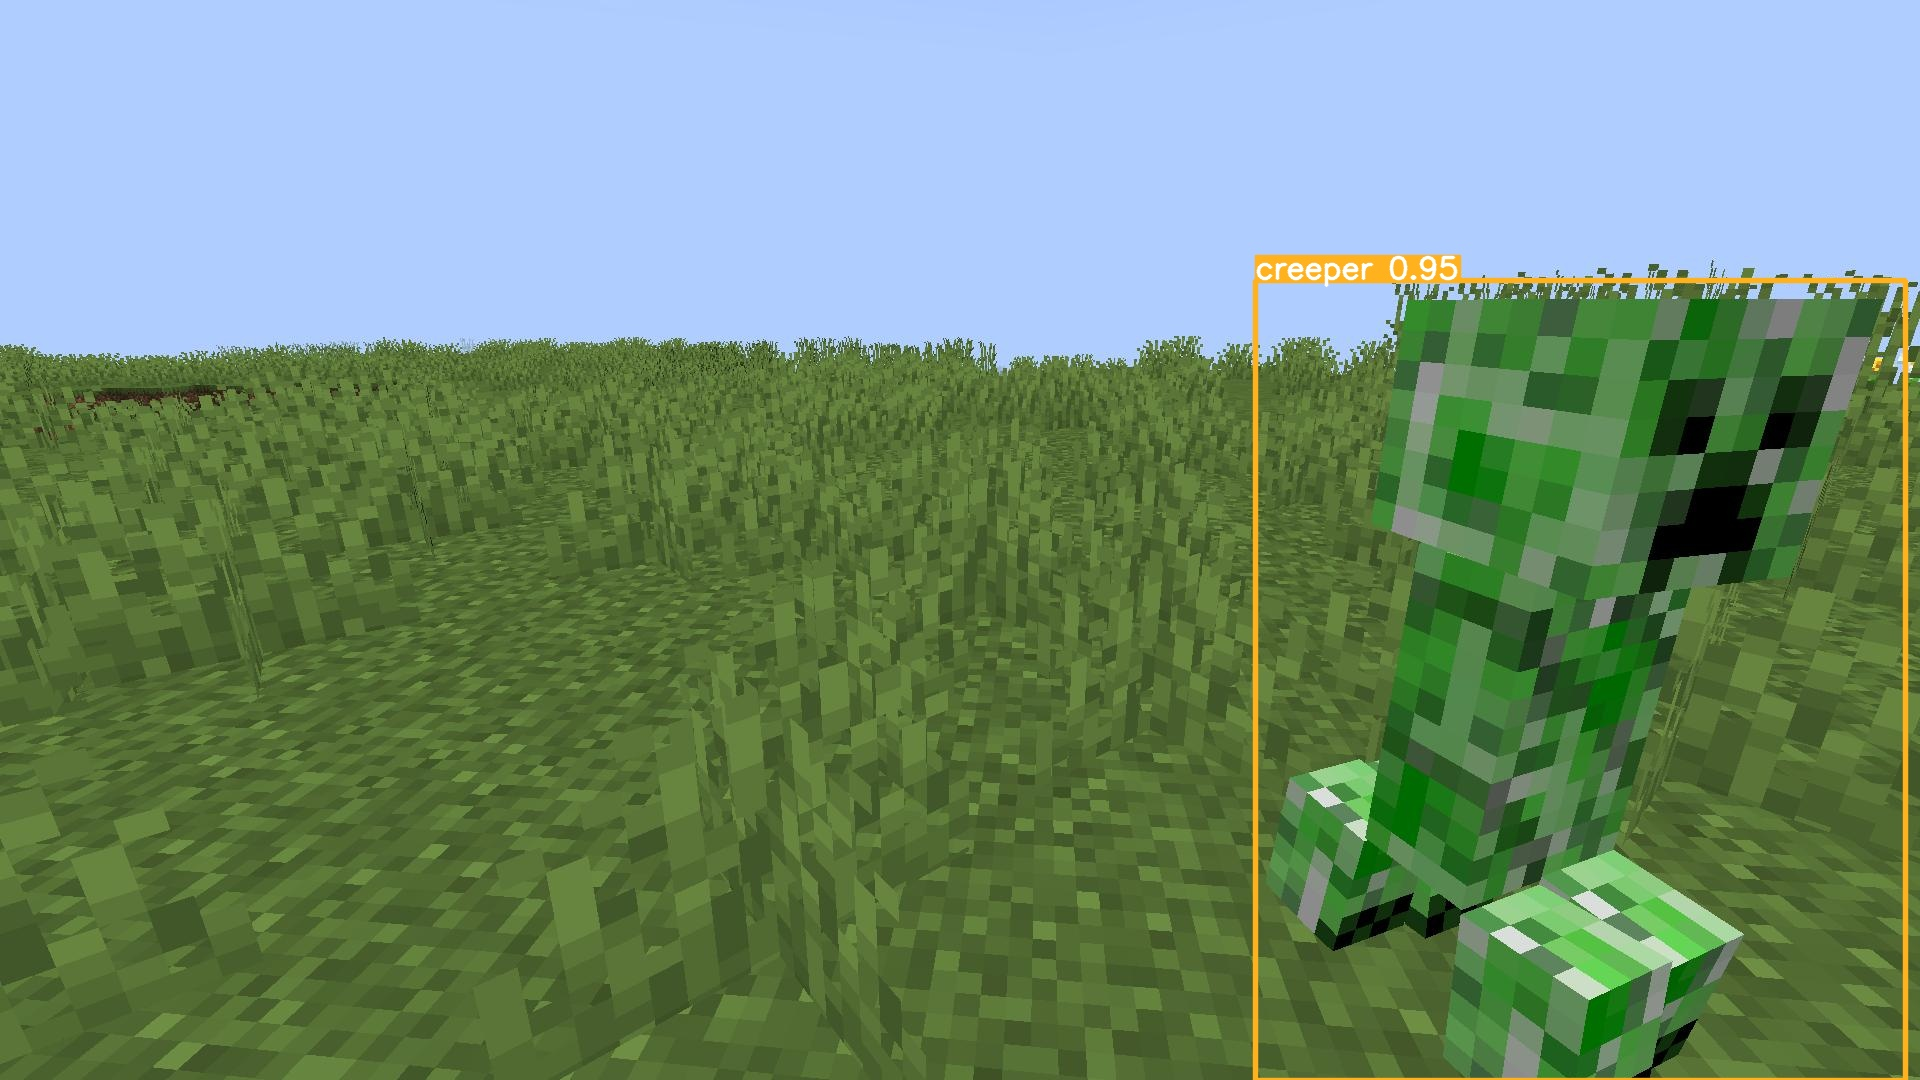

In [45]:
display(next(gen))

In [46]:
!pip install supervision


In [65]:
import supervision as sv
import numpy as np
from ultralytics import YOLO
import time


VIDEO_PATH = "/content/IMG_1142.MP4"

model = YOLO("/content/datasets/runs/detect/train/weights/best.pt")

video_info = sv.VideoInfo.from_video_path(VIDEO_PATH)

In [1]:
# last_process_time = time.time()
# def process_frame(frame: np.ndarray, _) -> np.ndarray:
#     results = model(frame, imgsz=1280, conf=0.8)[0]

#     detections = sv.Detections.from_yolov8(results)

#     box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)

#     labels = [f"{model.names[class_id]} {confidence:0.8f}" for _, _, confidence, class_id, _ in detections]
#     frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

#     return frame

# sv.process_video(source_path=VIDEO_PATH, target_path=f"result.mp4", callback=process_frame)